Stock Data Columns: Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')
Using 'Price' for Price Data
Using 'Chg%' for Change % Data


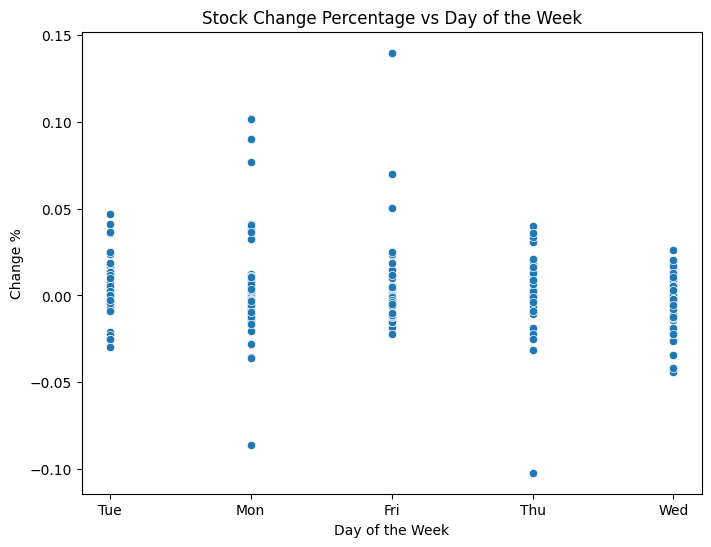

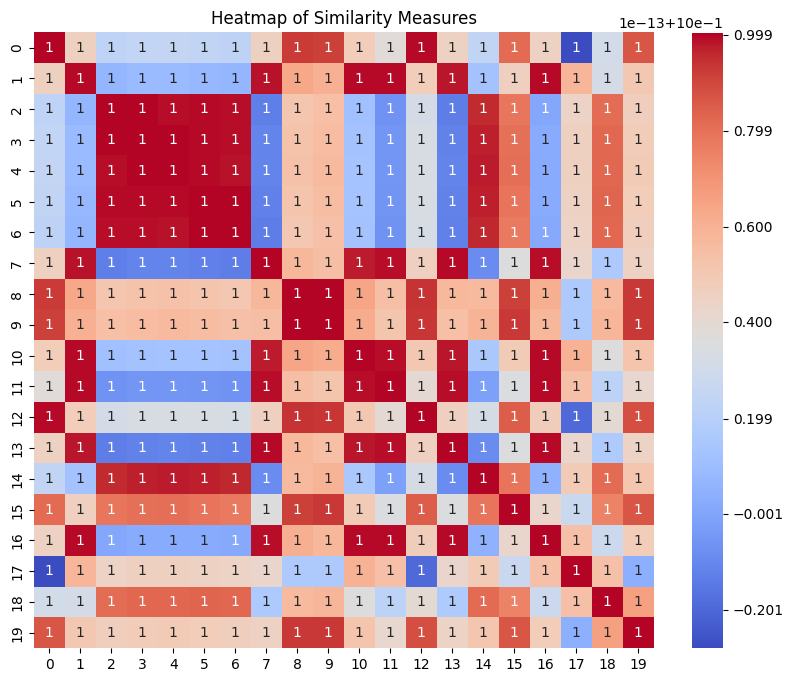

In [51]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Load Data
data_file = "Lab Session Data.xlsx"

# Question A1: Purchase Data Analysis
df_purchase = pd.read_excel(data_file, sheet_name="Purchase data")

# Ensure numeric data for matrix calculations
A = df_purchase.iloc[:, :-1].apply(pd.to_numeric, errors='coerce').fillna(0).values
C = df_purchase.iloc[:, -1].apply(pd.to_numeric, errors='coerce').fillna(0).values

vector_space_dim = A.shape[1]
num_vectors = A.shape[0]

rank_A = np.linalg.matrix_rank(A)
pseudo_inv_A = np.linalg.pinv(A)
cost_vector = np.dot(pseudo_inv_A, C)

# Question A2: Compute X
X = np.dot(pseudo_inv_A, C)

# Question A3: Categorizing Customers
df_purchase["Customer_Type"] = ["RICH" if x > 200 else "POOR" for x in C]

# Question A4: Stock Price Analysis
df_stock = pd.read_excel(data_file, sheet_name="IRCTC Stock Price")

# Ensure correct column names
price_column = "Price Column D"  # Adjust this if needed
change_column = "Chg% Column I"  # Adjust this if needed

# Load Stock Data
df_stock = pd.read_excel(data_file, sheet_name="IRCTC Stock Price")

# Print available column names to verify correct column
print("Stock Data Columns:", df_stock.columns)

# Strip spaces from column names
df_stock.columns = df_stock.columns.str.strip()

# Find correct column name
price_column = [col for col in df_stock.columns if "Price" in col][0]  # Auto-detect price column
change_column = [col for col in df_stock.columns if "Chg%" in col][0]  # Auto-detect change % column

print(f"Using '{price_column}' for Price Data")
print(f"Using '{change_column}' for Change % Data")

# Ensure price column is numeric
df_stock[price_column] = pd.to_numeric(df_stock[price_column], errors='coerce')
df_stock.dropna(subset=[price_column], inplace=True)

# Compute statistics
mean_price = statistics.mean(df_stock[price_column])
variance_price = statistics.variance(df_stock[price_column])

# Extract Wednesday prices safely
wednesday_data = df_stock[df_stock["Day"] == "Wednesday"][price_column].dropna()
sample_mean_wednesday = statistics.mean(wednesday_data) if not wednesday_data.empty else np.nan

# Probability of Loss
df_stock["Loss_Prob"] = df_stock[change_column].apply(lambda x: 1 if pd.to_numeric(x, errors='coerce') < 0 else 0)
prob_loss = df_stock["Loss_Prob"].mean()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_stock["Day"], y=df_stock[change_column])
plt.xlabel("Day of the Week")
plt.ylabel("Change %")
plt.title("Stock Change Percentage vs Day of the Week")
plt.show()

# Question A5: Thyroid Data Analysis
df_thyroid = pd.read_excel(data_file, sheet_name="thyroid0387_UCI")

attribute_types = df_thyroid.dtypes
missing_values = df_thyroid.isnull().sum()
outlier_detection = df_thyroid.describe()

# Encoding Categorical Columns
label_enc = LabelEncoder()
for col in df_thyroid.select_dtypes(include=["object"]).columns:
    df_thyroid[col] = label_enc.fit_transform(df_thyroid[col].astype(str))

# Question A6: Handling Missing Values
df_thyroid.fillna(df_thyroid.mean(), inplace=True)

# Question A7: Normalization
scaler = MinMaxScaler()
df_thyroid_normalized = scaler.fit_transform(df_thyroid.select_dtypes(include=[np.number]))

# Question A8: Jaccard and SMC Similarity
vec1, vec2 = df_thyroid.iloc[0, :], df_thyroid.iloc[1, :]

f11 = np.sum((vec1 == 1) & (vec2 == 1))
f00 = np.sum((vec1 == 0) & (vec2 == 0))
f01 = np.sum((vec1 == 0) & (vec2 == 1))
f10 = np.sum((vec1 == 1) & (vec2 == 0))

JC = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else np.nan
SMC = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else np.nan

# Question A9: Cosine Similarity
cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Question A10: Similarity Matrix & Heatmap
similarity_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        vec1, vec2 = df_thyroid.iloc[i, :], df_thyroid.iloc[j, :]
        similarity_matrix[i, j] = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Similarity Measures")
plt.show()
